In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm
from statsmodels.tsa.stattools import adfuller

In [2]:
counties = ["Carlow", "Cavan", "Clare", "Cork", "Donegal", "Dublin", "Galway", "Kerry", "Kildare", "Kilkenny", "Leitrim", "Limerick", "Laois","Mayo", "Meath", "Monaghan", "Offaly", "Roscommon", "Sligo", "Tipperary", "Waterford", "Westmeath", "Wexford", "Wicklow"]

In [3]:
datasets = {}

In [4]:
def process_weather(county):
    weather = pd.read_csv(f"Weather_data/{county}_weather.csv", index_col = "date")
    weather.index = pd.DatetimeIndex(weather.index)
    weather = weather[(weather.index >= "2020-03-01") & (weather.index < "2022-02-01")]
    weather[weather == ' '] = np.nan
    weather.rename(columns = {"maxt": 'maxtp', 'mint': "mintp"}, inplace = True)
    return weather

In [5]:
counties_with_max_tp = []
counties_with_min_tp = []
counties_with_humidity = []
counties_with_rain = []

for county in counties:

    columns = process_weather(county).columns

    if "maxtp" in columns:
        counties_with_max_tp.append(county)
    
    if "mintp" in columns:
        counties_with_min_tp.append(county)
    
    if "evap" in columns:
        counties_with_humidity.append(county)
    
    if "rain" in columns:
        counties_with_rain.append(county)

In [6]:

max_tp = pd.DataFrame()
min_tp = pd.DataFrame()
humidity = pd.DataFrame()
rain = pd.DataFrame()

for county in counties:

    county_cols = []

    if county in counties_with_max_tp:
        county_cols.append('maxtp')

    if county in counties_with_min_tp:
        county_cols.append('mintp')

    if county in counties_with_humidity:
        county_cols.append('evap')

    if county in counties_with_rain:
        county_cols.append('rain')

    data = process_weather(county)

    if "maxtp" in county_cols:
        max_tp[county] = data.loc[:, "maxtp"]
    
    if "mintp" in county_cols:
        min_tp[county] = data.loc[:, "mintp"]
    
    if 'evap' in county_cols:
        humidity[county] = data.loc[:, 'evap']
    
    if 'rain' in county_cols:
        rain[county] = data.loc[:, 'rain']


/var/folders/bs/b4wxnr6x4rs1cd3wk97bhy6r0000gn/T/ipykernel_41144/26324020.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  max_tp.mean(axis = 1).diff().plot(ax = ax[0, 0], color = 'crimson')
/var/folders/bs/b4wxnr6x4rs1cd3wk97bhy6r0000gn/T/ipykernel_41144/26324020.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  min_tp.mean(axis = 1).diff().plot(ax = ax[0, 1], color = 'plum')
/var/folders/bs/b4wxnr6x4rs1cd3wk97bhy6r0000gn/T/ipykernel_41144/26324020.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before call

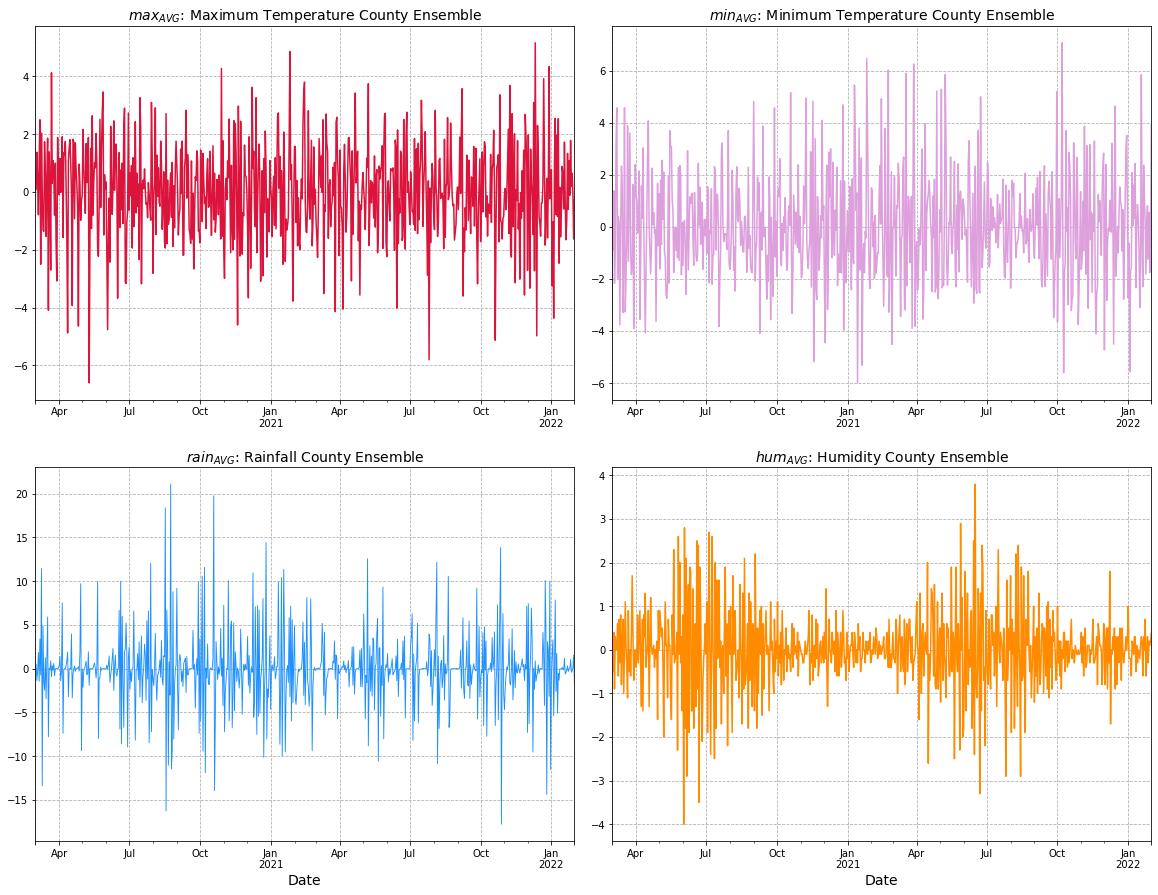

In [16]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows = 2, ncols = 2, gridspec_kw={"hspace": 0.18, 'wspace': 0.07})



max_tp.mean(axis = 1).diff().plot(ax = ax[0, 0], color = 'crimson')
min_tp.mean(axis = 1).diff().plot(ax = ax[0, 1], color = 'plum')
rain.mean(axis = 1).diff().plot(ax = ax[1, 0], color = 'dodgerblue', linewidth = 0.9)
humidity.mean(axis = 1).diff().plot(ax = ax[1, 1], color = 'darkorange')

fig.set_size_inches(20, 15)

ax[0, 0].set_xlabel("")
ax[0, 1].set_xlabel("")
ax[1, 0].set_xlabel("Date", fontsize = 14)
ax[1, 1].set_xlabel("Date", fontsize = 14)

ax[0, 0].set_title(r"$max_{AVG}$: Maximum Temperature County Ensemble", fontsize = 14)
ax[0, 1].set_title(r"$min_{AVG}$: Minimum Temperature County Ensemble", fontsize = 14)
ax[1, 0].set_title(r"$rain_{AVG}$: Rainfall County Ensemble", fontsize = 14)
ax[1, 1].set_title(r"$hum_{AVG}$: Humidity County Ensemble", fontsize = 14)

ax[0, 0].grid(linestyle = '--')
ax[0, 1].grid(linestyle = '--')
ax[1, 0].grid(linestyle = '--')
ax[1, 1].grid(linestyle = '--')

In [8]:
max_tp.mean(axis = 1).to_csv("max_tp_ensemble.csv")
min_tp.mean(axis = 1).to_csv("min_tp_ensemble.csv")
rain.mean(axis = 1).to_csv("rain_ensemble.csv")
humidity.mean(axis = 1).to_csv("humidity_ensemble.csv")

/var/folders/bs/b4wxnr6x4rs1cd3wk97bhy6r0000gn/T/ipykernel_41144/2142802807.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  max_tp.mean(axis = 1).to_csv("max_tp_ensemble.csv")
/var/folders/bs/b4wxnr6x4rs1cd3wk97bhy6r0000gn/T/ipykernel_41144/2142802807.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  min_tp.mean(axis = 1).to_csv("min_tp_ensemble.csv")
/var/folders/bs/b4wxnr6x4rs1cd3wk97bhy6r0000gn/T/ipykernel_41144/2142802807.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ra

In [9]:
weather = pd.concat([max_tp.mean(axis = 1), min_tp.mean(axis = 1), rain.mean(axis = 1), humidity.mean(axis = 1)], axis = 1)
weather.columns = ['max_tp', 'min_tp', 'rain', 'humidity']

/var/folders/bs/b4wxnr6x4rs1cd3wk97bhy6r0000gn/T/ipykernel_41144/3753826817.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  weather = pd.concat([max_tp.mean(axis = 1), min_tp.mean(axis = 1), rain.mean(axis = 1), humidity.mean(axis = 1)], axis = 1)


After finding that max_tp and humidity are non-stationary

In [10]:
weather['max_tp'] = weather['max_tp'].diff().fillna(0)

In [11]:
weather['humidity'] = weather['humidity'].diff().fillna(0)

In [12]:
weather.to_csv("Weather.csv")